In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import numpy as np

# Chargement du fichier CSV
csv_path = "donnees_brutes.csv"
df = pd.read_csv(csv_path)

# Affichage des premières lignes et informations sur le DataFrame
print("📊 Aperçu des données :")
display(df.head())

print("\n📝 Informations sur le DataFrame :")
display(df.info())

📊 Aperçu des données :


,dataset,id,messages,direction,metadata
0,doda,doda_570,[Row(content='ترجم من الفرنساوية للدارجة:\nQue...,fr_dr,NaN
1,doda,doda_40021,[Row(content='ترجم من الدارجة للفرنساوية:\nمان...,dr_fr,NaN
2,doda,doda_4171,[Row(content='ترجم من الدارجة للفرنساوية:\nماح...,dr_fr,NaN
3,doda,doda_40164,[Row(content='ترجم من الفرنساوية للدارجة:\nEll...,fr_dr,NaN
4,doda,doda_8575,[Row(content='ترجم من الدارجة للفرنساوية:\nسما...,dr_fr,NaN



📝 Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48068 entries, 0 to 48067
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dataset    48068 non-null  object 
 1   id         48068 non-null  object 
 2   messages   48068 non-null  object 
 3   direction  48068 non-null  object 
 4   metadata   0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


None

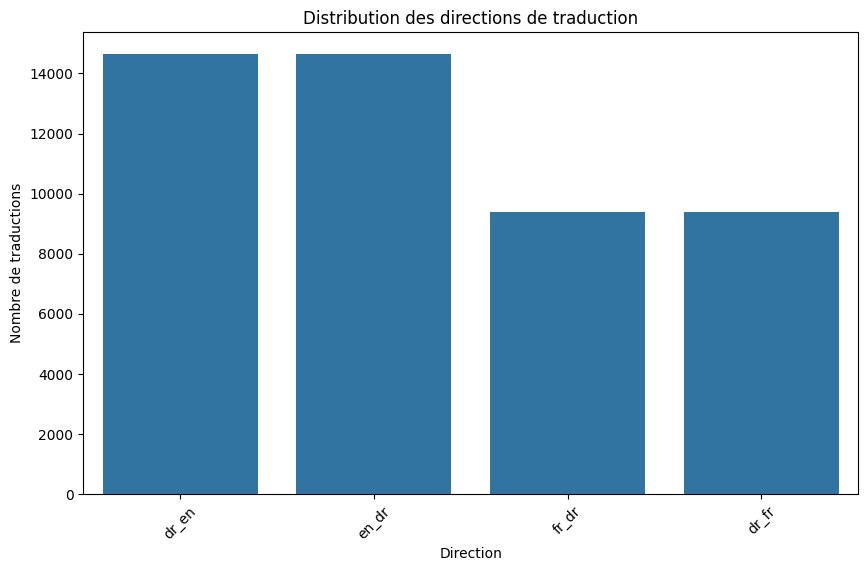


📊 Statistiques des directions de traduction :


direction
dr_en    14637
en_dr    14637
fr_dr     9397
dr_fr     9397
Name: count, dtype: int64

In [6]:
# Distribution des directions de traduction
plt.figure(figsize=(10, 6))
direction_counts = df['direction'].value_counts()
sns.barplot(x=direction_counts.index, y=direction_counts.values)
plt.title('Distribution des directions de traduction')
plt.xlabel('Direction')
plt.ylabel('Nombre de traductions')
plt.xticks(rotation=45)
plt.show()

# Affichage des statistiques
print("\n📊 Statistiques des directions de traduction :")
display(direction_counts)

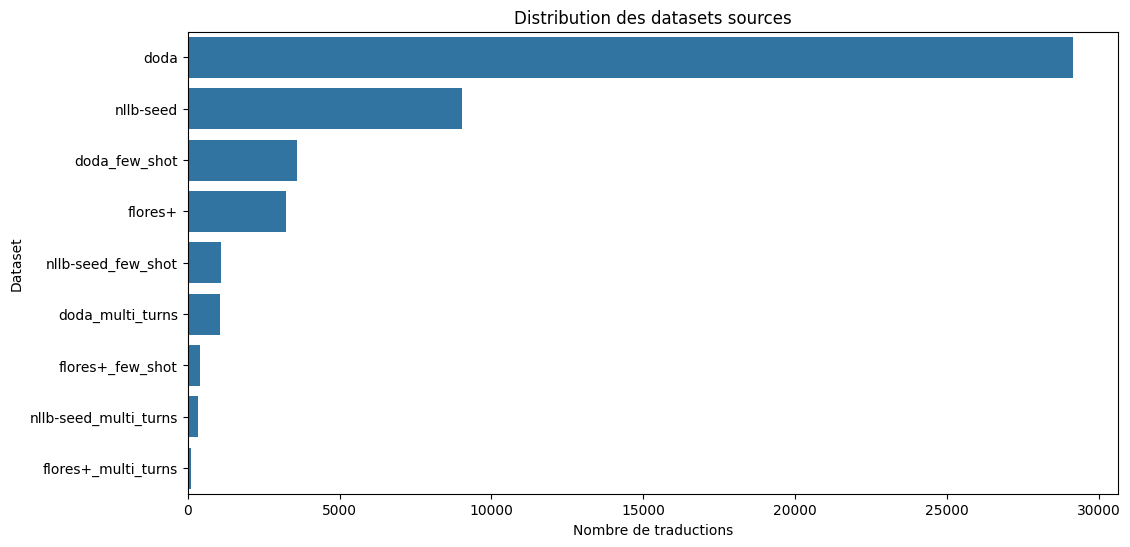


📊 Statistiques des datasets :


dataset
doda                     29160
nllb-seed                 9030
doda_few_shot             3600
flores+                   3228
nllb-seed_few_shot        1114
doda_multi_turns          1080
flores+_few_shot           400
nllb-seed_multi_turns      336
flores+_multi_turns        120
Name: count, dtype: int64

In [7]:
# Distribution des datasets
plt.figure(figsize=(12, 6))
dataset_counts = df['dataset'].value_counts()
sns.barplot(x=dataset_counts.values, y=dataset_counts.index)
plt.title('Distribution des datasets sources')
plt.xlabel('Nombre de traductions')
plt.ylabel('Dataset')
plt.show()

print("\n📊 Statistiques des datasets :")
display(dataset_counts)

In [8]:
# Conversion des messages JSON en liste
import json

def parse_messages(messages_json):
    try:
        return json.loads(messages_json)
    except:
        return None

# Analyse de la longueur des messages
df['messages_list'] = df['messages_json'].apply(parse_messages)
df['nb_messages'] = df['messages_list'].apply(lambda x: len(x) if x is not None else 0)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='nb_messages', bins=20)
plt.title('Distribution du nombre de messages par traduction')
plt.xlabel('Nombre de messages')
plt.ylabel('Fréquence')
plt.show()

print("\n📊 Statistiques sur le nombre de messages :")
display(df['nb_messages'].describe())

KeyError: 'messages_json'


📊 Statistiques sur la longueur des messages :
count    48068.000000
mean       133.207810
std        201.385918
min          3.000000
25%         43.000000
50%         61.000000
75%        141.000000
max       1925.000000
Name: message_length, dtype: float64


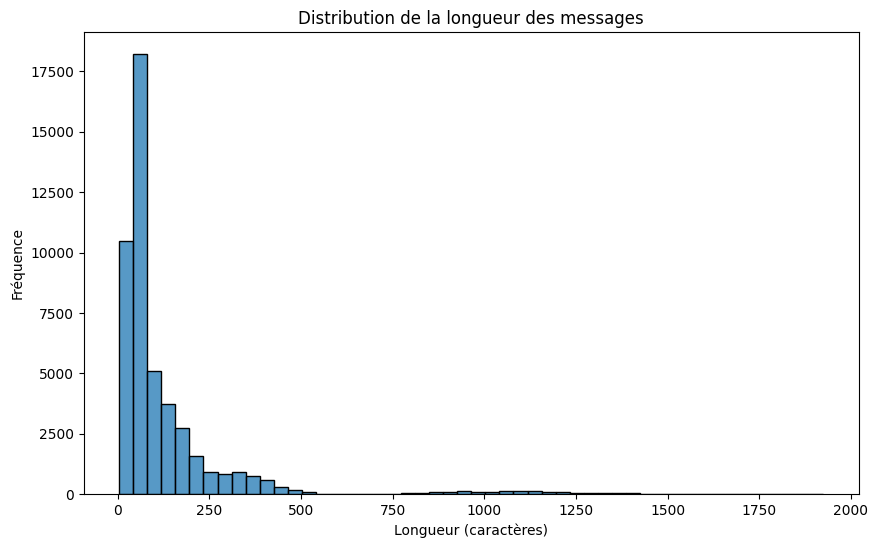


📊 Longueur moyenne des messages par direction :
direction
dr_en    155.77
dr_fr    102.64
en_dr    165.41
fr_dr     78.46
Name: message_length, dtype: float64


In [14]:
# Analyse de la longueur du contenu des messages
import json

def get_message_content_length(messages_json):
    try:
        messages = json.loads(messages_json)
        # On prend le premier message qui contient le texte à traduire
        if len(messages) > 0 and 'content' in messages[0]:
            # On enlève le préfixe "ترجم من الفرنساوية للدارجة:" et on compte la longueur
            content = messages[0]['content']
            if 'ترجم من الفرنساوية للدارجة:' in content:
                content = content.replace('ترجم من الفرنساوية للدارجة:', '').strip()
            return len(content)
        return 0
    except:
        return 0

# Ajout d'une colonne avec la longueur du contenu
df['message_length'] = df['messages_json'].apply(get_message_content_length)

# Statistiques sur la longueur des messages
print("\n📊 Statistiques sur la longueur des messages :")
print(df['message_length'].describe())

# Visualisation de la distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', bins=50)
plt.title('Distribution de la longueur des messages')
plt.xlabel('Longueur (caractères)')
plt.ylabel('Fréquence')
plt.show()

# Distribution par direction
print("\n📊 Longueur moyenne des messages par direction :")
print(df.groupby('direction')['message_length'].mean().round(2))

